In [1]:
!pip install -q grpcio

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.3.0'

In [6]:
fashion = tf.keras.datasets.fashion_mnist

In [7]:
(x_train, y_train), (x_test, y_test) = fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


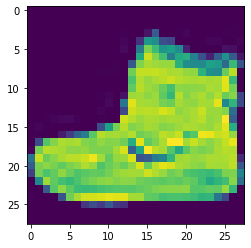

In [8]:
plt.imshow(x_train[0])

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# 1. Preprocessing of images
# 2. Preprocessing of lables -  one hot encoding
# 3. Modelling
# 4. Evaluate the model
# 5. Deployment

In [10]:
x_train = x_train/255.0  #  ( image pixel value  range - 0 - 255 )

In [11]:
x_test = x_test/255.0

In [12]:
y_train = tf.keras.utils.to_categorical(y_train)

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3),(1,1), activation='relu', input_shape = (28,28,1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax')) #softmax provide probabalites of each class of  classification (all probablites equal to 1)

In [16]:
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)

In [17]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [18]:
model.compile(optimizer='rmsprop', loss = tf.keras.losses.categorical_crossentropy, metrics= ['acc'])
model.fit(x_train, y_train, epochs= 10, validation_split= 0.1)

Epoch 1/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.4832 - acc: 0.8307 - val_loss: 0.3698 - val_acc: 0.8660
Epoch 2/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3465 - acc: 0.8796 - val_loss: 0.3440 - val_acc: 0.8768
Epoch 3/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3147 - acc: 0.8908 - val_loss: 0.3199 - val_acc: 0.8853
Epoch 4/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2960 - acc: 0.8969 - val_loss: 0.3180 - val_acc: 0.8900
Epoch 5/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2834 - acc: 0.9026 - val_loss: 0.3230 - val_acc: 0.8880
Epoch 6/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2744 - acc: 0.9048 - val_loss: 0.3033 - val_acc: 0.8927
Epoch 7/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.2668 - acc: 0.9085 - val_loss: 0.3162 - val_acc: 0.8923
Epoch 8/10
1688/1688 [==============================]

In [22]:
model_path = "fashion_minst/1"
model.save(model_path)

INFO:tensorflow:Assets written to: fashion_minst/2/assets


In [23]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  37730      0 --:--:-- --:--:-- --:--:-- 37730
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.

In [24]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 210 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.3.0 [210 MB]
Fetched 210 MB in 3s (67.8 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.3.0_all.deb ...
Unpacking tensorflow-model-server (2.3.0) ...
Setting up tensorflow-model-server (2.3.0) ...


In [29]:
!tensorflow_model_server --help

usage: tensorflow_model_server
Flags:
	--port=8500                      	int32	Port to listen on for gRPC API
	--grpc_socket_path=""            	string	If non-empty, listen to a UNIX socket for gRPC API on the given path. Can be either relative or absolute path.
	--rest_api_port=0                	int32	Port to listen on for HTTP/REST API. If set to zero HTTP/REST API will not be exported. This port must be different than the one specified in --port.
	--rest_api_num_threads=8         	int32	Number of threads for HTTP/REST API processing. If not set, will be auto set based on number of CPUs.
	--rest_api_timeout_in_ms=30000   	int32	Timeout for HTTP/REST API calls.
	--enable_batching=false          	bool	enable batching
	--allow_version_labels_for_unavailable_models=false	bool	If true, allows assigning unused version labels to models that are not available yet.
	--batching_parameters_file=""    	string	If non-empty, read an ascii BatchingParameters protobuf from the supplied file name and

In [30]:
%%bash --bg
nohup tensorflow_model_server \
--rest_api_port=8501 \
--model_name=fashion_minst \
--model_base_path=/content/fashion_minst > server.log 2>&1

Starting job # 2 in a separate thread.


In [65]:
! cat server.log

2020-11-07 16:01:25.977582: I tensorflow_serving/model_servers/server.cc:87] Building single TensorFlow model file config:  model_name: fashion_minst model_base_path: /content/fashion_minst
2020-11-07 16:01:25.977890: I tensorflow_serving/model_servers/server_core.cc:464] Adding/updating models.
2020-11-07 16:01:25.977926: I tensorflow_serving/model_servers/server_core.cc:575]  (Re-)adding model: fashion_minst
2020-11-07 16:01:26.078540: I tensorflow_serving/core/basic_manager.cc:739] Successfully reserved resources to load servable {name: fashion_minst version: 2}
2020-11-07 16:01:26.078588: I tensorflow_serving/core/loader_harness.cc:66] Approving load for servable version {name: fashion_minst version: 2}
2020-11-07 16:01:26.078601: I tensorflow_serving/core/loader_harness.cc:74] Loading servable version {name: fashion_minst version: 2}
2020-11-07 16:01:26.078646: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:31] Reading SavedModel from: /content/fashion_minst/2
2020-

4

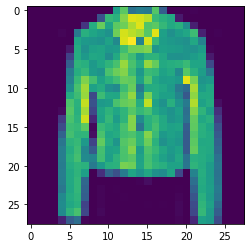

In [37]:
plt.imshow(x_test[10, :, :, 0])
y_test[10]

In [39]:
model.predict(np.expand_dims(x_test[10], 0))

array([[1.4532582e-04, 1.4544665e-05, 3.0870605e-02, 1.3250641e-06,
        9.3685454e-01, 1.9638687e-06, 3.2107580e-02, 9.3743256e-11,
        4.0504019e-06, 4.1281744e-08]], dtype=float32)

In [40]:
np.argmax(model.predict(np.expand_dims(x_test[10], 0)))

4

In [41]:
import json
import requests
data = json.dumps({"signature_name": "serving_default", "instances": np.expand_dims(x_test[10], 0).tolist() })
# remember dont send the np-array in data json please convert it to list

In [42]:
data

'{"signature_name": "serving_default", "instances": [[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.5686274509803921], [0.7450980392156863], [0.3803921568627451], [0.42745098039215684], [0.4117647058823529], [0.7333333333333333], [0.2980392156862745], [0.0], [0.0], [0.0], [0.00784313725490196], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.25098039215686274], [0.6666666666666666], [0.6392156862745098], [0.8156862745098039], [0.9529411764705882], [0.9411764705882353], [0.8980392156862745], [0.6784313725490196], [0.6352941176470588], [0.6039215686274509], [0.07058823529411765], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.15294117647058825], [0.6196078431372549], [0.7686274509803922], [0.5843137254901961], [0.7490196078431373], [0.7803921568627451], [0.8745098039215686], [0.9529411764705882], [0.7294117647058823], [0.749019607

In [64]:
%%time
num=54
data = json.dumps({"signature_name": "serving_default", "instances": np.expand_dims(x_test[num], 0).tolist() })
headers = {"content-type": "application/json"}
json_respone = requests.post("http://localhost:8501/v1/models/fashion_minst:predict", data=data, headers=headers)
pred = json.loads(json_respone.text)["predictions"]

CPU times: user 4 ms, sys: 966 µs, total: 4.96 ms
Wall time: 5.11 ms


In [63]:
np.argmax(pred), y_test[num]

(2, 2)